In [1]:
import DMM_socket as d
import matplotlib.pyplot as plt
import numpy as np
#from scipy.signal import butter, lfilter,lfilter_zi
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import math as m
import statistics as stat
import time
import allantools
#from allan_variance import allan_variance, params_from_avar


Rrite time= 0.0010101795196533203 [sec.]
Sigma= 2.985212456644131e-06 Begin= 7.01561 End= 7.015619   len= 178039


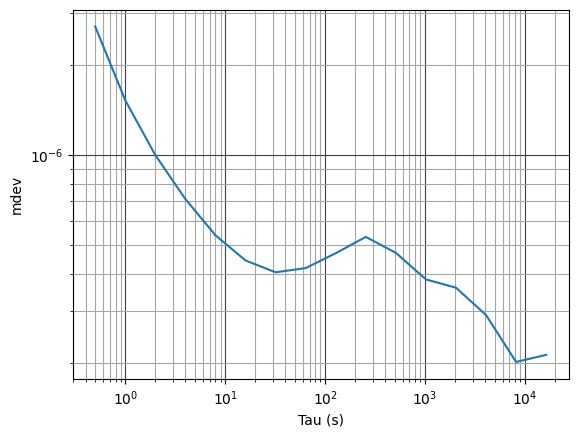

In [4]:
f_name='hp34970.pkl'
f_name='array3500.pkl'
#f_name='dmm6500_3.pkl'
f=d.fast_file()
data_set= f.load (f_name)
data_set[0] = data_set[10] #first sample is alway wrong . Overwrite it
Fs = 25
len = data_set.size
print ('Sigma=',np.std(data_set),'Begin=',data_set[1],'End=',data_set[len-1],'  len=',len)
# Compute a deviation using the Dataset class
a = allantools.Dataset(data=data_set, rate=2.0, data_type='freq')
a.compute("mdev")
# New in 2019.7 : write results to file
#a.write_result("output.dat")
# Plot it using the Plot class
b = allantools.Plot()
# New in 2019.7 : additional keyword arguments are passed to
# matplotlib.pyplot.plot()
b.plot(a, errorbars=True, grid=True)
# You can override defaults before "show" if needed
b.ax.set_xlabel("Tau (s)")
b.show()

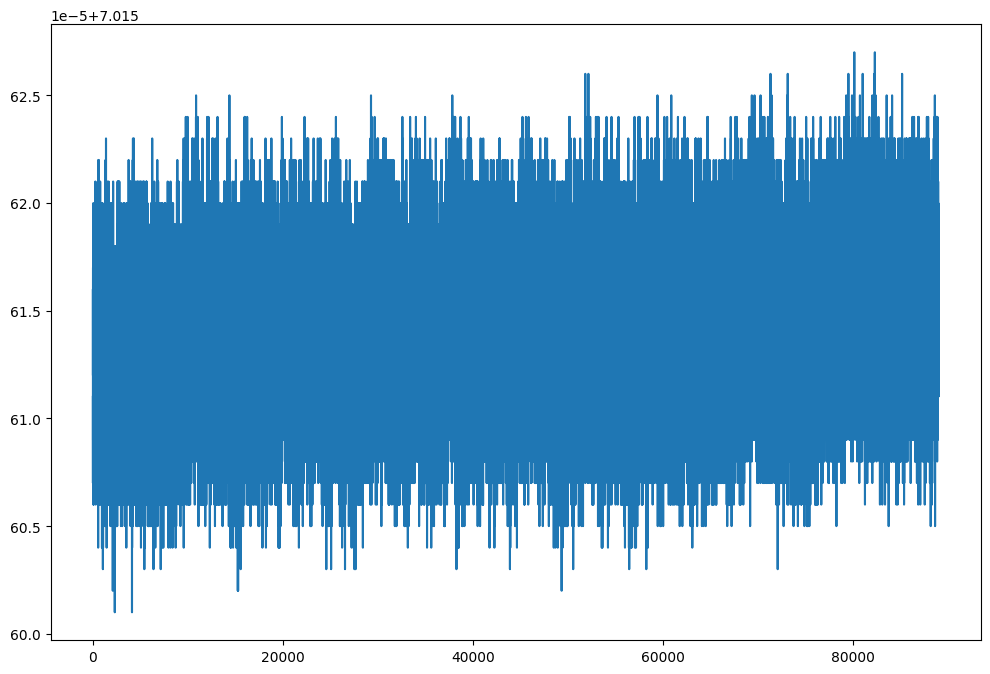

len= 178039 len/Fs= 89019.5


In [3]:
t=np.linspace (0,int(len/Fs),int(len))
plt.figure(figsize=(12,8))
plt.plot(t,data_set)
plt.show()
print ('len=', len,'len/Fs=',len/Fs)

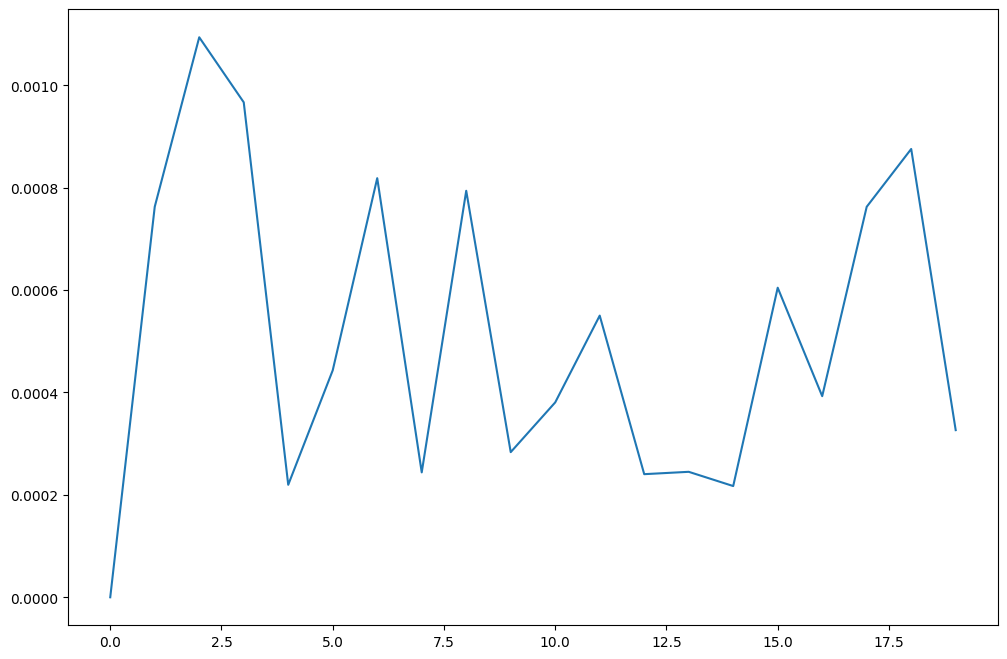

In [34]:
sp = np.fft.fft(data_set-np.mean(data_set))
#freq = np.fft.fftfreq(data_set)
plt.figure(figsize=(12,8))
ampl=np.sqrt(sp.real*sp.real+sp.imag *sp.imag)
#plt.plot(freq, sp.real, freq, sp.imag)
plt.plot(ampl[0:20])
plt.show()